In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [29]:
df = df.iloc[:, 2:]

df.sample(5)

,Age,EstimatedSalary,Purchased
385,56,60000,1
388,47,34000,1
312,38,50000,0
324,48,131000,1
23,45,22000,1


In [30]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

x_train.shape , x_test.shape 

((280, 2), (120, 2))

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [32]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [33]:
x_train_scaler

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [34]:
x_train_scaler = pd.DataFrame(x_train_scaler,columns=x_train.columns)
x_test_scaler = pd.DataFrame(x_test_scaler,columns=x_test.columns)

In [35]:
x_train_scaler

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [36]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [37]:
np.round(x_train_scaler.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


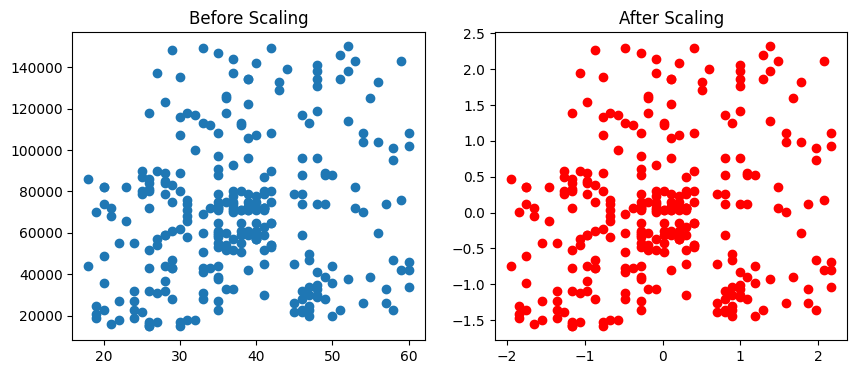

In [38]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))

ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(x_train_scaler['Age'],x_train_scaler['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')

plt.show()

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be

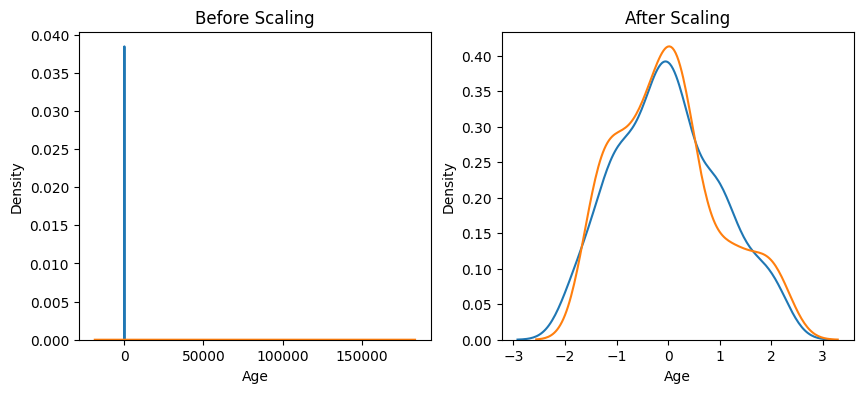

In [39]:
fig , (ax1,ax2) = plt.subplots(ncols=2,figsize=(10,4))

ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(x_train_scaler['Age'],ax=ax2)
sns.kdeplot(x_train_scaler['EstimatedSalary'],ax=ax2)

plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lr = LogisticRegression()
lrs = LogisticRegression()

In [43]:
lr.fit(x_train,y_train)
lrs.fit(x_train_scaler,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [48]:
y_pred = lr.predict(x_test)
y_pred_scaler = lrs.predict(x_test_scaler)

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
print('Accuracy without Scaling : ',accuracy_score(y_test,y_pred)*100)
print('Accuracy with Scaling : ',accuracy_score(y_test,y_pred_scaler)*100)

Accuracy without Scaling :  87.5
Accuracy with Scaling :  86.66666666666667
